<div style="text-align: center">
<h2><font color="#004D7F" size=6>POROYECTO FINAL</font></h2>
<h1></h1>

<div style="text-align: center">
<font color="#004D7F" size=5>Curso: Inteligencia Artificial</font><br>
<font color="#004D7F" size=5>Docente: Juan Villegas Cubas</font><br>
<font color="#004D7F" size=5>Alumon: Sandoval Chapoñan Anderson</font><br>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Junio 2021</font><br>
 
 
     
     

**INTRODUCCIÓN**

El Billboard Hot 100 es una gran lista de éxitos musicales de los 100 sencillos más vendidos en Estados Unidos, que ayuda a promover la industria musical nacional e internacional, y se define como la más importante de las listas de Billboard junto con la Billboard 200. La publicación del ranking Hot 100 se realiza semanalmente a través de la revista Billboard, y también vía Internet.

En el siguiente código se pretende análisar diversos datos de atributos de cantantes y de un histórico de canciones que alcanzaron entrar al Billboard Hot 100 (U.S.) en 2013 y 2014. 

**OBJETIVO**

Es en el mejor algoritmo que nos permita intentar predecir si un nuevo cantante podrá llegar a número uno de la lista Billboard Hot 100. 

**DATOS**

Vemos que tenemos: Titulo de la canción, artista “mood” ó estado de ánimo de esa canción, tempo, género, Tipo de artista, fecha en que apareció en el billboard (por ejemplo 20140628 equivale al 28 de junio de 2014), la columna TOP será nuestra etiqueta, en la que aparece 1 si llegó al número uno de Billboard ó 0 si no lo alcanzó y el año de Nacimiento del artista. Vemos que muchas de las columnas contienen información categórica. La columna durationSeg contiene la duración en segundos de la canción, siendo un valor continuo pero que nos convendrá pasar a categórico más adelante. 
    

In [ ]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
url='https://raw.githubusercontent.com/AndersonSCH/DataBillboard/Datos/artists_billboard_fix3.csv'

<a id="section1"></a>
# <font color="#004D7F"> Estadistica Descriptiva de los datos




<a id="section11"></a>
## <font color="#004D7F"> Cargar el conjunto de datos</font>

Análisis Exploratorio Inicial

In [ ]:
artists_billboard = pd.read_csv(r'https://raw.githubusercontent.com/AndersonSCH/DataBillboard/Datos/artists_billboard_fix3.csv')

In [ ]:
print(list(artists_billboard))

['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type', 'chart_date', 'durationSeg', 'top', 'anioNacimiento']


<a id="section12"></a>
## <font color="#004D7F">Revisar los datos: _head()_ </font>

In [ ]:
artists_billboard.shape

(635, 11)

In [ ]:
print(type(artists_billboard))

<class 'pandas.core.frame.DataFrame'>


<a id="section15"></a>
## <font color="#004D7F">Distribución entre clases: _groupby('class').size()_ </font>

¿Cuántos alcanzaron el número 1?

In [ ]:
artists_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

Esto nos devuelve (635,11) es decir que tenemos 11 columnas (features) y 635 filas de datos.

In [ ]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39,4,2,2,3,3.0,2.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25,6,2,3,2,1.0,6.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21,5,2,4,1,0.0,3.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25,4,2,1,3,1.0,2.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,30,4,2,2,2,2.0,3.0


<a id="section13"></a>
## <font color="#004D7F">Tipo de datos: _dtypes_ </font>

In [ ]:
artists_billboard.dtypes

id                  int64
title              object
artist             object
mood               object
tempo              object
genre              object
artist_type        object
chart_date          int64
durationSeg       float64
top                 int64
anioNacimiento    float64
dtype: object

In [ ]:
#comprobar los valores perdidos
data.isnull().sum()

top                   0
moodEncoded           0
tempoEncoded          0
genreEncoded          0
artist_typeEncoded    0
edadEncoded           0
durationEncoded       0
dtype: int64

<a id="section14"></a>
## <font color="#004D7F">Resumen: _describe()_ </font>

In [ ]:
artists_billboard.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000



<a id="section14"></a>
## <font color="#004D7F">Trazar relaciones en el conjunto de datos</font>



Hay diferentes formas de mostrar las relaciones mediante un conjunto de datos. Puede usar parcelas de pares, parcelas conjuntas, correlaciones, etc. que usaremos "pairplot" para averiguar las relaciones en el conjunto de datos.

Visualizamos esta diferencia:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


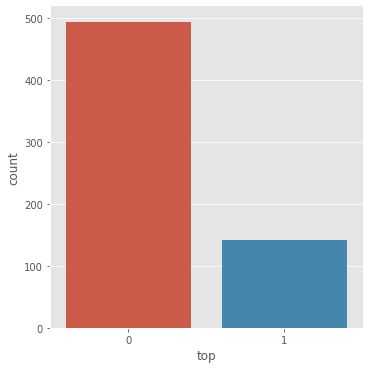

In [ ]:
sb.catplot('top',data=artists_billboard,kind="count")

Visualicemos los Atributos de entrada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


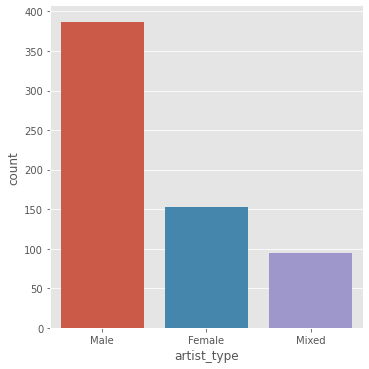

In [ ]:
sb.catplot('artist_type',data=artists_billboard,kind="count")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


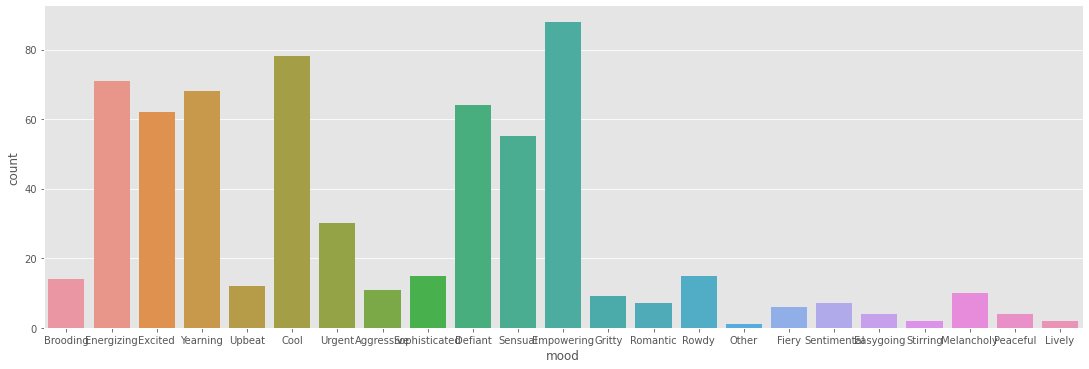

In [ ]:
sb.factorplot('mood',data=artists_billboard,kind="count", aspect=3)

Vemos que de 23 tipos de Mood, destacan 7 con picos altos. Además notamos que algunos estados de ánimo son similares

In [ ]:
artists_billboard.groupby('mood').size()

mood
Aggressive       11
Brooding         14
Cool             78
Defiant          64
Easygoing         4
Empowering       88
Energizing       71
Excited          62
Fiery             6
Gritty            9
Lively            2
Melancholy       10
Other             1
Peaceful          4
Romantic          7
Rowdy            15
Sensual          55
Sentimental       7
Sophisticated    15
Stirring          2
Upbeat           12
Urgent           30
Yearning         68
dtype: int64

**estado animico
Agresivo 11
Cautiverio 14
# Fresco 78
# Desafiante 64
Tranquilo 4
# Empoderamiento 88
# Energizante 71
# Emocionado 62
Ardiente 6
Arenoso 9
Animado 2
Melancolía 10
Otro 1
Pacífica 4
Romántico 7
Rowdy 15
# Sensual 55
Sentimental 7
Sofisticado 15
Revolviendo 2
Optimista 12
Urgente 30
# Anhelo 68

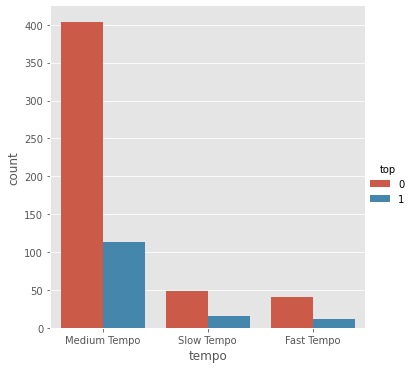

In [ ]:
sb.factorplot('tempo',data=artists_billboard,hue='top',kind="count")

En esta gráfica vemos que hay 3 tipos de Tempo: Medium(medio), Slow(lento) y Fast(rapido). Evidentemente predominan los tiempos Medium y también es donde encontramos más canciones que hayan alcanzado el Top 1 (en azul)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


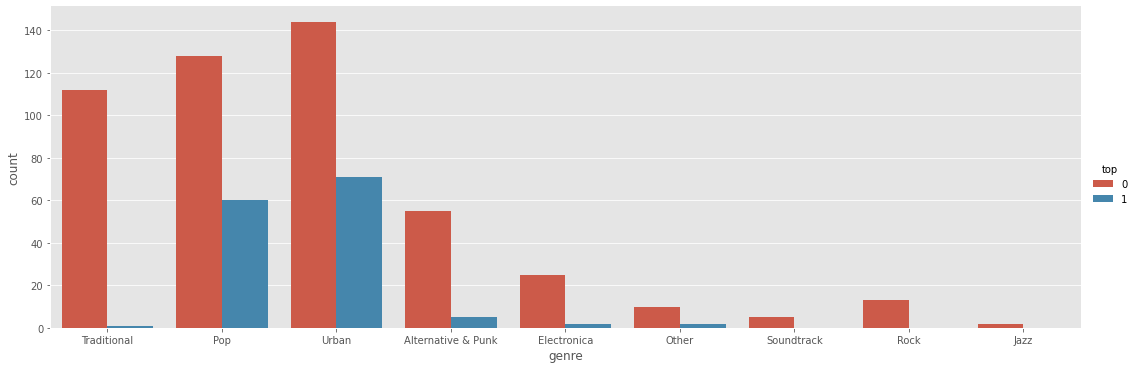

In [ ]:
sb.catplot('genre',data=artists_billboard,hue='top',kind="count", aspect=3)

                        Aqui notamos algo raro: en el año “cero” tenemos cerca de 140 registros


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


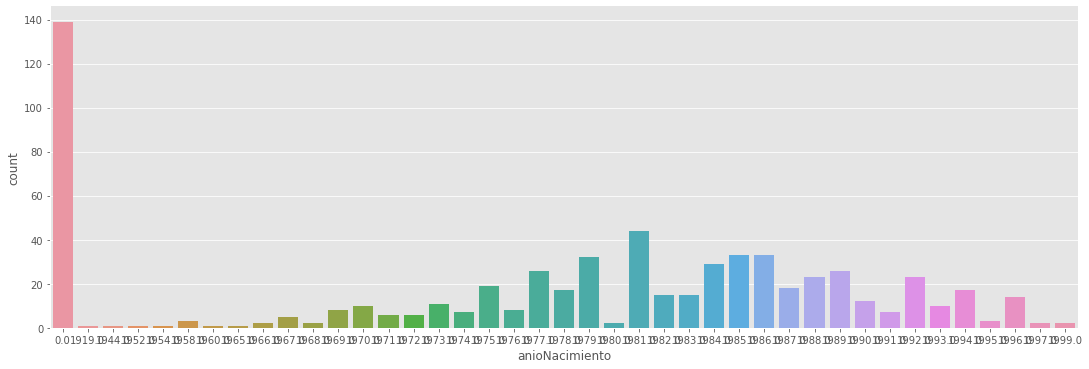

In [ ]:
sb.factorplot('anioNacimiento',data=artists_billboard,kind="count", aspect=3)

                            Aqui notamos algo raro: en el año “cero” tenemos cerca de 140 registros

**Comparemos los Top y los No-top** - **Buscamos si hay alguna relación evidente entre Año y duración de Canción**

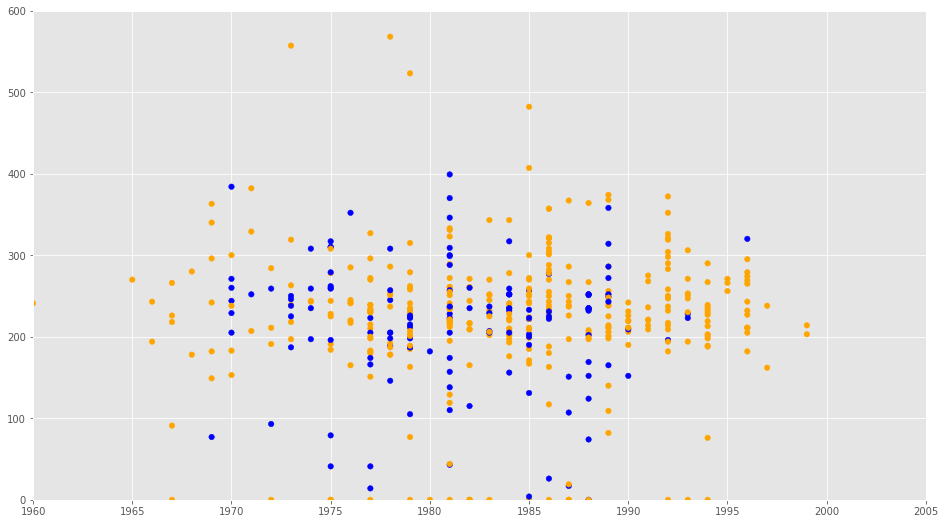

In [ ]:
colores=['orange','blue']
tamanios=[60,40]

f1 = artists_billboard['anioNacimiento'].values
f2 = artists_billboard['durationSeg'].values

asignar=[]
for index, row in artists_billboard.iterrows():    
    asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([1960,2005,0,600])
plt.show()

**Arreglar las Edades de Artistas**

In [ ]:
def edad_fix(anio):
    if anio==0:
        return None
    return anio

artists_billboard['anioNacimiento']=artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1);

In [ ]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio

artists_billboard['edad_en_billboard']=artists_billboard.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1);

In [ ]:
print(type(artists_billboard))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,NaN


**Calculamos promedio de edad y asignamos a los registros Nulos**

In [ ]:
age_avg = artists_billboard['edad_en_billboard'].mean()
age_std = artists_billboard['edad_en_billboard'].std()
age_null_count = artists_billboard['edad_en_billboard'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(artists_billboard['edad_en_billboard'])

artists_billboard.loc[np.isnan(artists_billboard['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list
artists_billboard['edad_en_billboard'] = artists_billboard['edad_en_billboard'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desvió Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


**Visualizamos las edades que agregamos**

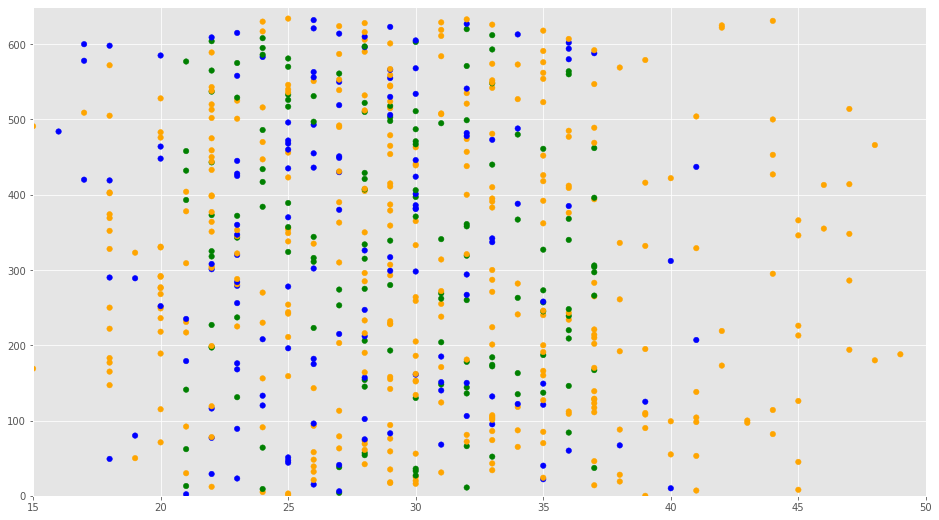

In [ ]:
f1 = artists_billboard['edad_en_billboard'].values
f2 = artists_billboard.index

colores = ['orange','blue','green']

asignar=[]
for index, row in artists_billboard.iterrows():    
    if (conValoresNulos[index]):
        asignar.append(colores[2]) # verde
    else:
        asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([15,50,0,650])
plt.show()

Realizaremos un mapeo de los atributos de entrada para poder transformarlos a categorias que 
podamos utilzar 

In [ ]:
separador = "### ### ###"
grouped11 = artists_billboard.groupby('mood').size()#.sum().reset_index()
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)
print(separador)
print("Tempos de Canción: " + str(artists_billboard['tempo'].unique()))
print(separador)
print("Tipos de Artista: " + str(artists_billboard['artist_type'].unique()))
print(separador)
grouped11 = artists_billboard.groupby('genre').size()#.sum().reset_index()
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)

mood
Empowering       88
Cool             78
Energizing       71
Yearning         68
Defiant          64
Excited          62
Sensual          55
Urgent           30
Sophisticated    15
Rowdy            15
Brooding         14
Upbeat           12
Aggressive       11
Melancholy       10
Gritty            9
Romantic          7
Sentimental       7
Fiery             6
Peaceful          4
Easygoing         4
Lively            2
Stirring          2
Other             1
dtype: int64
### ### ###
Tempos de Canción: ['Medium Tempo' 'Slow Tempo' 'Fast Tempo']
### ### ###
Tipos de Artista: ['Male' 'Female' 'Mixed']
### ### ###
genre
Urban                 215
Pop                   188
Traditional           113
Alternative & Punk     60
Electronica            27
Rock                   13
Other                  12
Soundtrack              5
Jazz                    2
dtype: int64


In [ ]:
# Mood Mapping 
artists_billboard['moodEncoded'] = artists_billboard['mood'].map( {'Energizing': 6, 
                                        'Empowering': 6,
                                        'Cool': 5, 
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3, 
                                        'Sensual': 2, 
                                        'Gritty': 3, #coraje 
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3, 
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4, 
                                        'Romantic': 2, 
                                        'Peaceful': 1, 
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)
# Tempo Mapping 
artists_billboard['tempoEncoded'] = artists_billboard['tempo'].map( {'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0} ).astype(int)
# Genre Mapping 
artists_billboard['genreEncoded'] = artists_billboard['genre'].map( {'Urban': 4, 
                                          'Pop': 3, 
                                          'Traditional': 2, 
                                          'Alternative & Punk': 1,
                                         'Electronica': 1, 
                                          'Rock': 1, 
                                          'Soundtrack': 0, 
                                          'Jazz': 0,
                                          'Other':0,'':0} 
                                       ).astype(int)
# artist_type Mapping 
artists_billboard['artist_typeEncoded'] = artists_billboard['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed': 1, '': 0} ).astype(int)


# Mapping edad en la que llegaron al billboard
artists_billboard.loc[ artists_billboard['edad_en_billboard'] <= 21, 'edadEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 21) & (artists_billboard['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 26) & (artists_billboard['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 30) & (artists_billboard['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
artists_billboard.loc[ artists_billboard['edad_en_billboard'] > 40, 'edadEncoded'] = 4

# Mapping Song Duration
artists_billboard.loc[ artists_billboard['durationSeg'] <= 150, 'durationEncoded'] 					       = 0
artists_billboard.loc[(artists_billboard['durationSeg'] > 150) & (artists_billboard['durationSeg'] <= 180), 'durationEncoded'] = 1
artists_billboard.loc[(artists_billboard['durationSeg'] > 180) & (artists_billboard['durationSeg'] <= 210), 'durationEncoded'] = 2
artists_billboard.loc[(artists_billboard['durationSeg'] > 210) & (artists_billboard['durationSeg'] <= 240), 'durationEncoded'] = 3
artists_billboard.loc[(artists_billboard['durationSeg'] > 240) & (artists_billboard['durationSeg'] <= 270), 'durationEncoded'] = 4
artists_billboard.loc[(artists_billboard['durationSeg'] > 270) & (artists_billboard['durationSeg'] <= 300), 'durationEncoded'] = 5
artists_billboard.loc[ artists_billboard['durationSeg'] > 300, 'durationEncoded'] = 6

Finalmente obtenemos un nuevo conjunto de datos llamado artists_encoded con el que tenemos los atributos definitivos para crear nuestro árbol. Para ello, quitamos todas las columnas que no necesitamos con “drop”:

In [ ]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = artists_billboard.drop(drop_elements, axis = 1)

**Analizamos nuestros datos de Entrada Categóricos**

In [ ]:
artists_encoded.head(10)

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,4,2,2,3,3.0,2.0
1,0,6,2,3,2,1.0,6.0
2,1,5,2,4,1,0.0,3.0
3,0,4,2,1,3,1.0,2.0
4,0,4,2,2,2,2.0,3.0
5,0,5,2,2,3,1.0,3.0
6,1,5,1,4,2,2.0,0.0
7,0,3,0,3,3,4.0,6.0
8,0,4,2,4,2,4.0,2.0
9,0,4,2,1,3,1.0,6.0


In [ ]:
lis=(artists_encoded.loc[range(0,len(artists_encoded)),'top'])

In [ ]:
My_Array=[]
for i in range(0,len(lis)) :
  if lis[i]==0:
    My_Array.append(i)

In [ ]:
print(My_Array)
print(len(My_Array))

[0, 1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 76, 78, 79, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 123, 124, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 152, 153, 154, 155, 156, 158, 159, 160, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 177, 178, 180, 181, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 209, 210, 211, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 253, 254, 255, 257, 259, 260, 261, 262, 263, 264, 265, 266, 268, 269, 270, 271,

In [ ]:
from random import * 

My_ArrayFinal=[]
My_ArrayFinal=sample(My_Array,353)

In [ ]:
print(My_ArrayFinal)
print(len(My_ArrayFinal))


[164, 625, 142, 553, 88, 250, 233, 276, 191, 277, 376, 249, 202, 158, 604, 162, 101, 111, 423, 112, 593, 483, 200, 362, 391, 467, 246, 443, 508, 554, 265, 85, 144, 19, 523, 214, 465, 527, 194, 148, 135, 415, 287, 410, 45, 582, 94, 181, 238, 231, 489, 552, 562, 350, 345, 70, 348, 183, 253, 607, 452, 557, 354, 579, 129, 314, 197, 375, 490, 318, 14, 136, 379, 322, 268, 529, 444, 211, 78, 71, 531, 457, 336, 178, 292, 474, 471, 269, 321, 514, 109, 167, 500, 76, 413, 546, 254, 387, 343, 595, 199, 628, 4, 426, 61, 591, 137, 188, 223, 572, 359, 335, 27, 184, 339, 128, 281, 16, 219, 32, 503, 378, 172, 103, 1, 99, 624, 139, 577, 236, 275, 190, 46, 551, 36, 601, 266, 418, 138, 394, 271, 459, 205, 304, 259, 201, 57, 486, 230, 91, 402, 590, 198, 52, 153, 620, 458, 355, 532, 38, 461, 193, 608, 507, 513, 344, 612, 50, 108, 622, 119, 155, 224, 547, 511, 264, 227, 25, 492, 118, 286, 403, 409, 408, 477, 39, 361, 54, 98, 341, 617, 218, 209, 536, 411, 414, 113, 66, 126, 485, 480, 195, 306, 81, 542, 166, 2

In [ ]:
drop_elements = My_ArrayFinal
artists_encoded = artists_encoded.drop(drop_elements, axis = 0)

<a id="section24"></a>
## <font color="#004D7F">Fase de modelado
</font>

<a id="section41"></a>
## <font color="#004D7F">Crear conjunto de validación</font>

In [ ]:
data =artists_encoded
array = data.values
# matriz separada en componentes de entrada y salida
X_cla = array[:,1:7]
Y_cla = array[:,0]
data.shape

(282, 7)

<a id="section42"></a>
## <font color="#004D7F">Evaluación de línea base</font>

In [ ]:
# Logistic Regression Classification 
from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=10)
model=LogisticRegression(solver='lbfgs', max_iter=1000)
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 64.17%  (6.11) %


In [ ]:
# LDA Classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

kfold=KFold(n_splits=10)
model=LinearDiscriminantAnalysis()
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 64.89%  (5.64) %


In [ ]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold=KFold(n_splits=10)
model=KNeighborsClassifier(n_neighbors=9, algorithm="kd_tree")
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 64.91%  (6.48) %


In [ ]:
# CART Classification
from sklearn.tree import DecisionTreeClassifier

kfold=KFold(n_splits=10)
model=DecisionTreeClassifier(criterion="entropy")
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 65.25%  (6.14) %


In [ ]:
# Gaussian Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB

kfold=KFold(n_splits=10)
model=GaussianNB()
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 66.31%  (7.52) %


In [ ]:
# CART Classification
from sklearn.tree import DecisionTreeClassifier

kfold=KFold(n_splits=10)
model=DecisionTreeClassifier(criterion="entropy")
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 66.32%  (6.57) %


In [ ]:
# SVM Classification
from sklearn.svm import SVC

kfold=KFold(n_splits=10)
model=SVC(gamma="auto", C=2.0, kernel="rbf")
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 65.22%  (7.45) %


In [ ]:
models=[]
models.append(("RL", LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier(n_neighbors=9, algorithm="kd_tree")))
models.append(("Naive Bayes", GaussianNB()))
models.append(("CART", DecisionTreeClassifier(criterion="entropy")))
models.append(("SVM", SVC(gamma="auto", C=2.0, kernel="rbf")))

results=[]
names=[]
scoring="accuracy"
kfold=KFold(n_splits=10)
for name, model in models: 
    cv_results=cross_val_score(model, X_cla, Y_cla, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"Accuracy: {name}: {cv_results.mean()*100.0:,.2f}%  ({cv_results.std()*100.0:,.2f}) %")

Accuracy: RL: 64.17%  (6.11) %
Accuracy: LDA: 64.89%  (5.64) %
Accuracy: KNN: 64.91%  (6.48) %
Accuracy: Naive Bayes: 66.31%  (7.52) %
Accuracy: CART: 67.00%  (7.85) %
Accuracy: SVM: 65.22%  (7.45) %


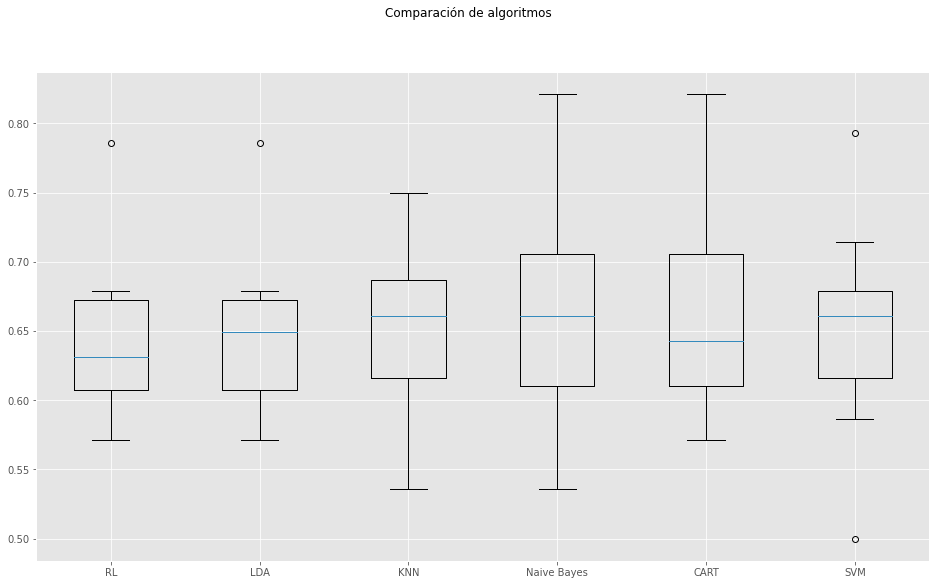

In [ ]:
fig=plt.figure()
fig.suptitle("Comparación de algoritmos")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A partir de estos resultados del accuracy, observamos que SVM es el algoritmo que parece adecuado para estudios adicionales sobre este problema; sin embargo el conjunto de datos no es balanceado, por lo que realizamos la comparación con la métrica de Kappa, donde se muestra que el algoritmo SVM sigue teniendo los mejores resultados

In [ ]:
#Obtenemos el conjunto de entrenamiento y de prueba para los atributos y la clase
from sklearn.metrics import cohen_kappa_score
X_train, X_test,Y_train,Y_test=train_test_split(X_cla,Y_cla, test_size=0.33)
for name, model in models: 
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    cohen_score=cohen_kappa_score(Y_test, predicted)
    print(f"Cohens Ccore {name}: {cohen_score*100.0:,.2f}%")

Cohens Ccore RL: 23.37%
Cohens Ccore LDA: 23.37%
Cohens Ccore KNN: 32.01%
Cohens Ccore Naive Bayes: 34.04%
Cohens Ccore CART: 38.24%
Cohens Ccore SVM: 21.13%


In [ ]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier

kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
model=BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 68.44%  (8.73) %


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

kfold=KFold(n_splits=10)

model=RandomForestClassifier(n_estimators=100, max_features=3, random_state=7)
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 70.22%  (8.09) %


In [ ]:
# Extra Trees Regression
from sklearn.ensemble import ExtraTreesClassifier

kfold=KFold(n_splits=10)

model=ExtraTreesClassifier(n_estimators=100, max_features=3, random_state=7)
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 68.45%  (5.76) %


In [ ]:
# AdaBoost for Classification
from sklearn.ensemble import AdaBoostClassifier

kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
model=AdaBoostClassifier(n_estimators=100)
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 66.98%  (5.92) %


In [ ]:
# Gradient Boosting Machine for Classification
from sklearn.ensemble import GradientBoostingClassifier

kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
model=GradientBoostingClassifier(n_estimators=100)
results=cross_val_score(model, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 68.05%  (7.32) %


In [ ]:
# Voting for Classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

kfold=KFold(n_splits=10)

#Creamos los submodelos a trabajar
estimator=[]

model1=ExtraTreesClassifier(n_estimators=100, max_features=3)
model2 = LinearDiscriminantAnalysis()
model3 = SVC(gamma="auto", C=2.0, kernel="rbf")
estimator.append(("Extra Trees", model1))
estimator.append(("LDA", model2))
estimator.append(("SVM", model3))

#Creación del algoritmo de conjunto
ensemble=VotingClassifier(estimator)
results=cross_val_score(ensemble, X_cla, Y_cla, cv=kfold)
print(f"Accuracy {results.mean()*100.0:,.2f}%  ({results.std()*100.0:,.2f}) %")

Accuracy 66.31%  (6.87) %


In [ ]:
#importing libraries
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
X_train, X_test,Y_train,Y_test=train_test_split(X_cla, Y_cla, test_size=0.50)
print('Train', X_train.shape, 'Test', X_test.shape)

Train (141, 6) Test (141, 6)


In [ ]:
Modelos_Base = [
                LinearDiscriminantAnalysis(solver="lsqr",shrinkage=0.1),
                BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20),
                SVC(gamma="scale",kernel="poly",degree=5),
                GaussianNB(),
                AdaBoostClassifier(n_estimators=20, random_state=7),
               ]

In [ ]:
class SuperLearner():
    def __init__(self,BaseModels,MetaModel,Folds,Random_State):
        
        self.BaseModels   = BaseModels
        self.MetaModel    = MetaModel
        self.Folds        = Folds
        self.Random_State = Random_State
        
    def fit(self,X,Y):
        MetaX = []
        MetaY = []
        Kfold = KFold(n_splits=self.Folds,random_state=self.Random_State ,shuffle=True)
        for Train_iX, Test_iX in Kfold.split(X):
            FoldY = []
            X_Train, X_Test = X[Train_iX], X[Test_iX]
            Y_Train, Y_Test = Y[Train_iX], Y[Test_iX]
            
            MetaY.extend(Y_Test)
            
            for model in self.BaseModels:
                model.fit(X_Train,Y_Train)
                ModelPredict = model.predict(X_Test)
                FoldY.append(ModelPredict.reshape(-1,1))
                
            MetaX.append(np.hstack(FoldY))
            
        MetaInput  = np.vstack(MetaX)
        MetaTarget = np.asarray(MetaY)
        
        self.MetaModel.fit(MetaInput,MetaTarget)
        
        return self
    
    def predict(self,X):
        MetaX = []
        for model in self.BaseModels:
            ModelPredict = model.predict(X)
            MetaX.append(ModelPredict.reshape(-1,1))
            
        MetaX = np.hstack(MetaX)
        
        MMPredict = self.MetaModel.predict(MetaX)
        
        return MMPredict


In [ ]:
Meta_Modelo  = ExtraTreesClassifier(n_estimators=100, max_features=3, random_state=7)

In [ ]:
Modelos      = {
                "LoR" :LogisticRegression(solver="lbfgs",max_iter=1000),
                "LDA" :LinearDiscriminantAnalysis(),
                "KNN" :KNeighborsClassifier(n_neighbors=9, algorithm="kd_tree"),
                "Naive Bayes":GaussianNB(),
                "SVC" :SVC(gamma="auto", C=2.0, kernel="rbf"),
                "CART":DecisionTreeClassifier(criterion="entropy"),
                "RF"  :RandomForestClassifier(n_estimators=100, max_features=3, random_state=7),
                "ET"  :ExtraTreesClassifier(n_estimators=100, max_features=3, random_state=7),
                "AB"  :AdaBoostClassifier(n_estimators=100, random_state=7),
                "GBM" :GradientBoostingClassifier(n_estimators=100,random_state=7,max_features="auto"),
                "SL"  :SuperLearner(BaseModels=Modelos_Base,MetaModel=Meta_Modelo,Folds=10,Random_State=3),
                "BDTC":BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
               }

In [ ]:
Metrica  = ["kappa","precision-0","recall-0","f1-0","precision-1","recall-1","f1-1"]

In [ ]:
data      = np.zeros((len(Metrica),len(Modelos.keys())))
Metricas  = pd.DataFrame(data,index=Metrica,columns=Modelos.keys())

In [ ]:
for model in Modelos.keys():
    
    Modelos[model].fit(X_train,Y_train)
    
    Predic          = Modelos[model].predict(X_test)
    CohenScore      = cohen_kappa_score(Y_test,Predic)
    Reporte         = classification_report(Y_test,Predic,target_names=["Clase 0","Clase 1"],output_dict=True)
    
    Metricas.loc[Metrica,[model]] = np.around(np.array([CohenScore,
                                                        Reporte["Clase 0"]["precision"],
                                                        Reporte["Clase 0"]["recall"],
                                                        Reporte["Clase 0"]["f1-score"],
                                                        Reporte["Clase 1"]["precision"],
                                                        Reporte["Clase 1"]["recall"],
                                                        Reporte["Clase 1"]["f1-score"]]).reshape(-1,1),decimals=3)
    
Metricas.head(7)

,LoR,LDA,KNN,Naive Bayes,SVC,CART,RF,ET,AB,GBM,SL,BDTC
kappa,0.359,0.359,0.367,0.298,0.416,0.164,0.263,0.291,0.121,0.175,0.246,0.220
precision-0,0.672,0.672,0.725,0.661,0.703,0.556,0.606,0.620,0.535,0.567,0.606,0.586
recall-0,0.642,0.642,0.552,0.552,0.672,0.597,0.642,0.657,0.567,0.567,0.597,0.612
f1-0,0.656,0.656,0.627,0.602,0.687,0.576,0.623,0.638,0.551,0.567,0.602,0.599
precision-1,0.688,0.688,0.667,0.647,0.714,0.609,0.657,0.671,0.586,0.608,0.640,0.634
recall-1,0.716,0.716,0.811,0.743,0.743,0.568,0.622,0.635,0.554,0.608,0.649,0.608
f1-1,0.702,0.702,0.732,0.692,0.728,0.587,0.639,0.653,0.569,0.608,0.644,0.621


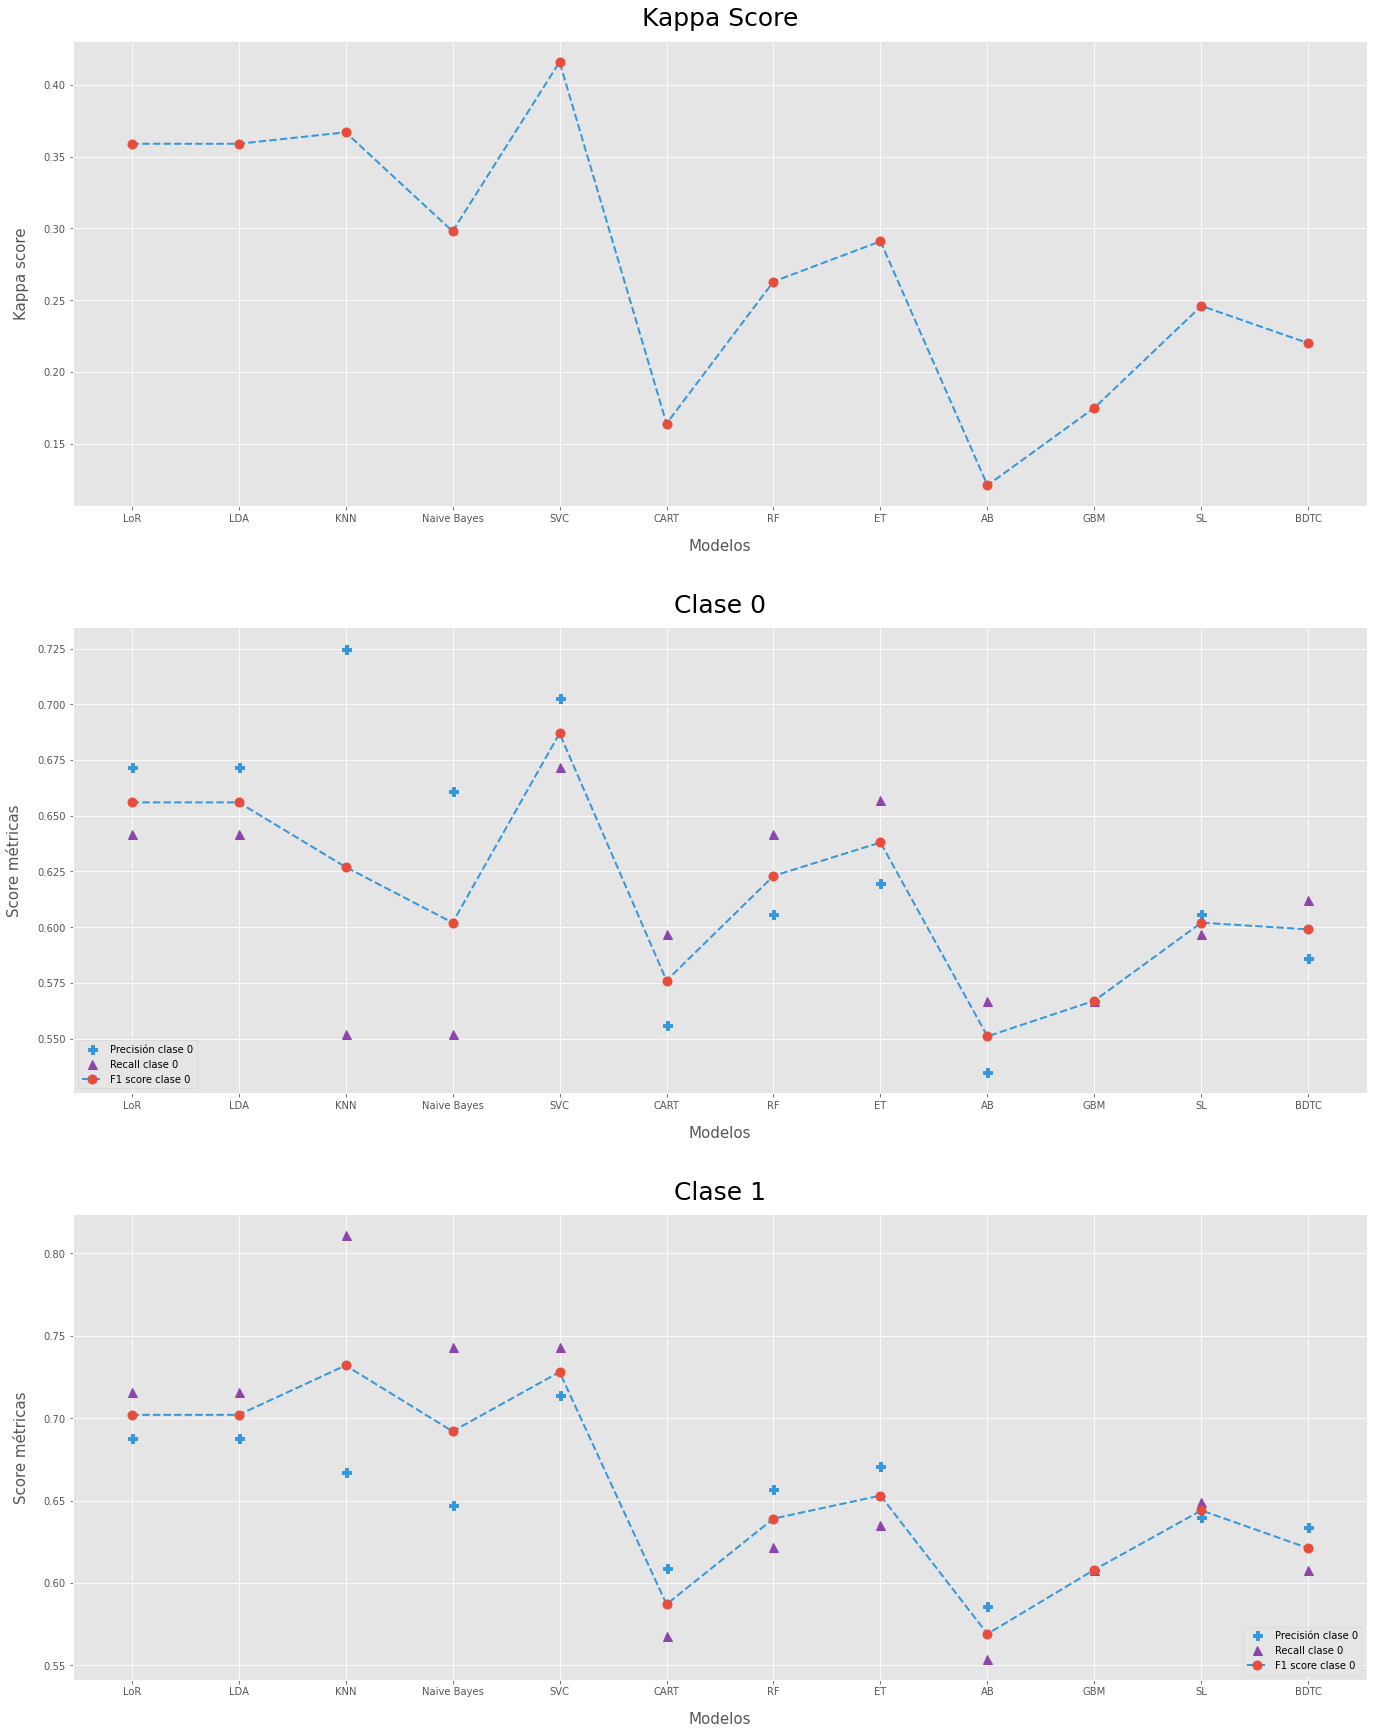

In [ ]:
plt.figure(figsize=(20,25),tight_layout={"pad":4})
# --- subplot --- #
plt.subplot(311)
plt.plot(range(len(Modelos.keys())),
         Metricas.loc[["kappa"],Modelos.keys()].to_numpy().reshape(-1,1),
         marker="o",ms=9.0,mfc="#e74c3c",mec="#e74c3c",ls='--',lw=2.0,color="#3498db")
plt.xticks(range(len(Modelos.keys())),Modelos.keys())
plt.xlabel("Modelos",fontdict={"fontsize":15},labelpad=15.0)
plt.ylabel("Kappa score",fontdict={"fontsize":15},labelpad=15.0)
plt.title("Kappa Score",fontdict={"fontsize":25},pad=15.0)
# --- SUBPLOT 1 --- #
plt.subplot(312)
# --- PLOTS --- #
plt.plot(range(len(Modelos.keys())),Metricas.loc[["precision-0"],Modelos.keys()].to_numpy().reshape(-1,1),
         label="Precisión clase 0",marker="P",mfc="#3498db",mec="#3498db",ms=9.0,ls="")
plt.plot(range(len(Modelos.keys())),Metricas.loc[["recall-0"],Modelos.keys()].to_numpy().reshape(-1,1),
         label="Recall clase 0",marker="^",mfc="#8e44ad",mec="#8e44ad",ms=9.0,ls="")
plt.plot(range(len(Modelos.keys())),Metricas.loc[["f1-0"],Modelos.keys()].to_numpy().reshape(-1,1),
         label="F1 score clase 0",marker="o",ms=9.0,mfc="#e74c3c",mec="#e74c3c",ls='--',lw=2.0,color="#3498db")
# --- ETIQUETAS --- #
plt.xticks(range(len(Modelos.keys())),Modelos.keys())
plt.xlabel("Modelos",fontdict={"fontsize":15},labelpad=15.0)
plt.ylabel("Score métricas",fontdict={"fontsize":15},labelpad=15.0)
plt.legend(markerscale=1.0,loc="lower left")
plt.title("Clase 0",fontdict={"fontsize":25},pad=15.0)
# --- SUBPLOT 2 --- #
plt.subplot(313)
# --- PLOTS --- #
plt.plot(range(len(Modelos.keys())),Metricas.loc[["precision-1"],Modelos.keys()].to_numpy().reshape(-1,1),
         label="Precisión clase 0",marker="P",mfc="#3498db",mec="#3498db",ms=9.0,ls="")
plt.plot(range(len(Modelos.keys())),Metricas.loc[["recall-1"],Modelos.keys()].to_numpy().reshape(-1,1),
         label="Recall clase 0",marker="^",mfc="#8e44ad",mec="#8e44ad",ms=9.0,ls="")
plt.plot(range(len(Modelos.keys())),Metricas.loc[["f1-1"],Modelos.keys()].to_numpy().reshape(-1,1),
         label="F1 score clase 0",marker="o",ms=9.0,mfc="#e74c3c",mec="#e74c3c",ls='--',lw=2.0,color="#3498db")
# --- ETIQUETAS --- #
plt.xticks(range(len(Modelos.keys())),Modelos.keys())
plt.xlabel("Modelos",fontdict={"fontsize":15},labelpad=15.0)
plt.ylabel("Score métricas",fontdict={"fontsize":15},labelpad=15.0)
plt.legend(markerscale=1.0,loc="lower right")
plt.title("Clase 1",fontdict={"fontsize":25},pad=15.0)

plt.show()

OBtimizacion 

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

c=np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
k=np.array(['linear', 'rbf', 'poly'])
param_grid=dict(C=c, kernel=k)
model=SVC()
grid=GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_cla, Y_cla)
print(f"Mejor Accuracy: {grid.best_score_.mean()*100.0:,.2f}%")
print(f"Mejor C: {grid.best_estimator_.C}")
print(f"Mejor Kernel: {grid.best_estimator_.kernel}")

Mejor Accuracy: 69.14%
Mejor C: 1.0
Mejor Kernel: poly


Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_random={'C': uniform(1,100)}
model=SVC()
rsearch=RandomizedSearchCV(estimator=model, param_distributions=param_random, n_iter=50, cv=5)
rsearch.fit(X_cla, Y_cla)

print(f"Mejor Accuracy: {rsearch.best_score_.mean()*100.0:,.2f}%")
print(f"Mejor C: {rsearch.best_estimator_.C}")

Mejor Accuracy: 69.48%
Mejor C: 16.803830423385335


<a id="section6"></a>
# <font color="#004D7F">Forecasting</font>

El siguiente ejemplo muestra cómo se puede entrenar un modelo SVCy Extra Trees  , guardar el modelo en un archivo y cargarlo para hacer predicciones en el conjunto de datos no etiquetados.

La ejecución del ejemplo guarda el modelo en modelSVC.sav y modelET.sav finalizado en su directorio de trabajo local. Carguamos el modelo guardado y evaluamos proporcionando una estimación de la accuracy del modelo en datos no etiquetados.

 Forecasting

In [ ]:
# Save Model Using Pickle
from sklearn.model_selection import train_test_split
import pickle as pkl
# Train/test
X_train, X_test, Y_train, Y_test = train_test_split(X_cla,Y_cla, test_size=0.33, random_state=7)
# Fit the model on 33%
estimadores=[]
estimadores.append(("standarize", StandardScaler()))
estimadores.append(("SVC", SVC()))
model=Pipeline(estimadores)
model.fit(X_train, Y_train)
# save the model to disk
filename = 'modelSVC.sav'
pkl.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb'))
results = loaded_model.score(X_test, Y_test)
print(f'Accuracy: {results.mean()*100.0:,.2f}%')

Accuracy: 65.96%


In [ ]:
# Save Model Using Pickle
from sklearn.model_selection import train_test_split
import pickle as pkl
# Train/test
X_train, X_test, Y_train, Y_test = train_test_split(X_cla,Y_cla, test_size=0.33)
# Fit the model on 33%
estimadores=[]
estimadores.append(("standarize", StandardScaler()))
estimadores.append(("ET", ExtraTreesClassifier()))
model=Pipeline(estimadores)
model.fit(X_train, Y_train)
# save the model to disk
filename = 'modelET.sav'
pkl.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb'))
results = loaded_model.score(X_test, Y_test)
print(f'Accuracy: {results.mean()*100.0:,.2f}%')

Accuracy: 68.09%


<a id="section6"></a>
# <font color="#004D7F">Joblib</font>
 

In [ ]:
# Save Model Using joblib
import joblib as jbl
# Train / Test
X_train, X_test, Y_train, Y_test = train_test_split(X_cla,Y_cla, test_size=0.33, random_state=7)
# Fit the model on 33%
estimadores = []
estimadores.append(("standarize", StandardScaler()))
estimadores.append(('SVC', SVC()))
model = Pipeline(estimadores)
model.fit(X_train, Y_train)
# save the model to disk
filename = 'modelSVC-jbl.sav'
jbl.dump(model, filename)

['modelSVC-jbl.sav']

In [ ]:
# load the model from disk
loaded_model = jbl.load(filename)
results = loaded_model.score(X_test, Y_test)
print(f'Accuracy: {results.mean()*100.0:,.2f}%')

Accuracy: 65.96%


In [ ]:
predictions = loaded_model.predict(X_test)
nombres =['moodEncoded','tempoEncoded','genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded']
predicted_data = pd.DataFrame(X_test, columns=nombres)
predictions_df = pd.DataFrame(predictions, columns=['top'])
df_pred = pd.concat([predicted_data, predictions_df], axis=1)
df_pred

,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded,top
0,5.0,2.0,3.0,3.0,1.0,0.0,1.0
1,4.0,2.0,3.0,2.0,1.0,0.0,1.0
2,6.0,2.0,3.0,3.0,4.0,5.0,0.0
3,5.0,2.0,4.0,3.0,3.0,4.0,1.0
4,5.0,0.0,4.0,3.0,3.0,6.0,1.0
...,...,...,...,...,...,...,...
89,4.0,2.0,1.0,2.0,3.0,2.0,0.0
90,6.0,2.0,1.0,3.0,2.0,0.0,0.0
91,6.0,2.0,2.0,3.0,2.0,4.0,0.0
92,3.0,2.0,1.0,3.0,1.0,5.0,0.0


In [ ]:
# Save Model Using joblib
import joblib as jbl
# Train / Test
X_train, X_test, Y_train, Y_test = train_test_split(X_cla,Y_cla, test_size=0.33)
# Fit the model on 33%
estimadores = []
estimadores.append(("standarize", StandardScaler()))
estimadores.append(('ET', ExtraTreesClassifier()))
model1 = Pipeline(estimadores)
model1.fit(X_train, Y_train)
# save the model to disk
filename1 = 'modelET-jbl.sav'
jbl.dump(model1, filename1)

['modelET-jbl.sav']

In [ ]:
# load the model from disk
loaded_model1 = jbl.load(filename1)
results = loaded_model1.score(X_test, Y_test)
print(f'Accuracy: {results.mean()*100.0:,.2f}%')

Accuracy: 70.21%


In [ ]:
predictions = loaded_model1.predict(X_test)
nombres =['moodEncoded','tempoEncoded','genreEncoded','artist_typeEncoded','edadEncoded','durationEncoded']
predicted_data = pd.DataFrame(X_test, columns=nombres)
predictions_df = pd.DataFrame(predictions, columns=['top'])
df_pred = pd.concat([predicted_data, predictions_df], axis=1)
df_pred

,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded,top
0,5.0,2.0,3.0,1.0,1.0,3.0,0.0
1,6.0,0.0,1.0,3.0,1.0,1.0,0.0
2,5.0,2.0,1.0,2.0,0.0,6.0,0.0
3,3.0,2.0,4.0,3.0,3.0,3.0,0.0
4,5.0,0.0,4.0,2.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...
89,6.0,2.0,3.0,2.0,1.0,3.0,1.0
90,2.0,2.0,4.0,3.0,1.0,3.0,0.0
91,5.0,0.0,3.0,2.0,0.0,3.0,0.0
92,6.0,2.0,3.0,2.0,0.0,4.0,1.0


CONCLUCIONES 

Pues hemos tenido un largo camino, para poder crear y generar nuestro mejor algoritmo . Hemos revisado los datos de entrada, los hemos procesado, los pasamos a valores categóricos y generamos es provado la eficiencia y la optimizacion de los mismos y por ultimo, Lo hemos puesto a prueba para validarlo.

Obtener un score de menos de 65.96% y 70.01% en los algoritmos de SVC y ET  no es un valor muy alto, pero tengamos en cuenta que nos pusimos una tarea bastante difícil de lograr: poder predecir al número 1 del Billboard y con un tamaño de muestras tan pequeño (635 registros) y desbalanceado. Ya quisieran las discográficas poder hacerlo 🙂



Link de referencias : 

1.-Michael Kling: 
https://mikekling.com/analyzing-the-billboard-hot-100/

2.- API de Deezer:
https://developers.deezer.com/api

3.- BASE DE DATOS DE ULTIMATE MUSIC
http://www.umdmusic.com/default.asp?Lang=English&Chart=D